## 1. IMPORT REQUIRED PACKAGES/ LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## 2. LOAD THE HOUSING DATASET

In [2]:
train = pd.read_csv("Data\Housing_dataset_train.csv", low_memory=False)

test = pd.read_csv("Data\Housing_dataset_test.csv", low_memory=False)

## 3. EXPLORATORY DATA ANALYSIS

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [8]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [7]:
# Checking for duplicated row.
train.duplicated().value_counts()

False    14000
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

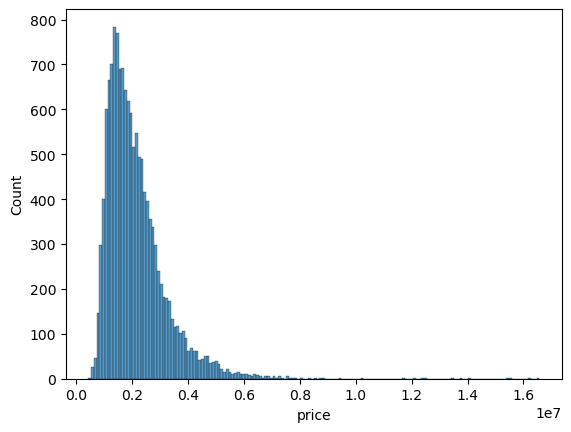

In [8]:
sns.histplot(x = 'price', data = train)

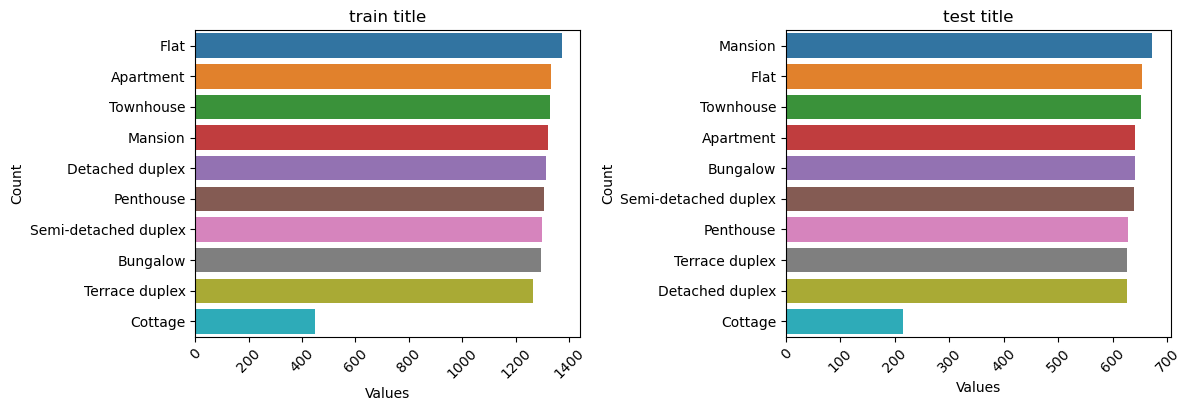

In [9]:
# Create subplots for multiple count plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

order = train['title'].value_counts().index  # Get categories ordered by count
orderx = test['title'].value_counts().index  # Get categories ordered by count
# Plot the count plots on separate subplots
sns.countplot(data=train, y='title', order=order, ax=axes[0])
sns.countplot(data=test, y='title', order=orderx, ax=axes[1])
#sns.countplot(data=test, x='', ax=axes[2])

# Set the labels and title for each subplot
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Count')
axes[0].set_title('train title')

axes[1].set_xlabel('Values')
axes[1].set_ylabel('Count')
axes[1].set_title('test title')


# Adjust spacing between subplots
plt.tight_layout()
# Rotate x-axis labels in the second subplot
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Display the plot
plt.show()


<AxesSubplot:xlabel='bedroom', ylabel='Count'>

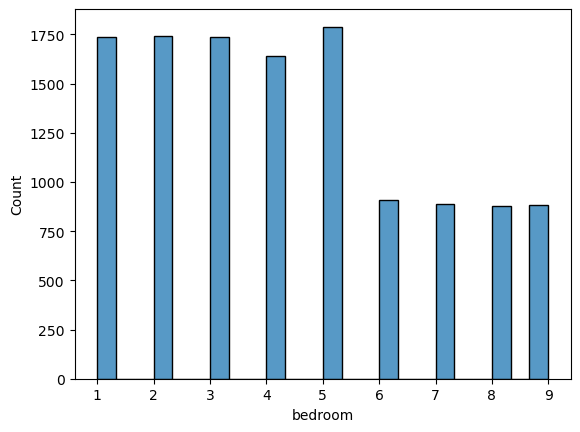

In [10]:
sns.histplot(x = 'bedroom', data = train)

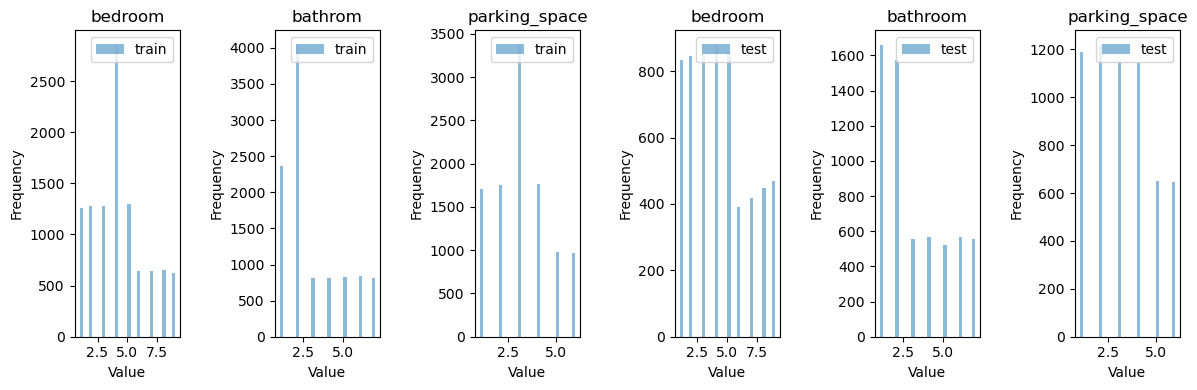

In [45]:
# Create subplots for multiple histograms
fig, axes = plt.subplots(1, 6, figsize=(12, 4))

# Plot the histograms on separate subplots
axes[0].hist(train['bedroom'], bins=30, alpha=0.5, label='train')
axes[1].hist(train['bathroom'], bins=30, alpha=0.5, label='train')
axes[2].hist(train['parking_space'], bins=30, alpha=0.5, label='train')
axes[3].hist(test['bedroom'], bins=30, alpha=0.5, label='test')
axes[4].hist(test['bathroom'], bins=30, alpha=0.5, label='test')
axes[5].hist(test['parking_space'], bins=30, alpha=0.5, label='test')

# Set the labels and title for each subplot
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('bedroom')

axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('bathrom')

axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('parking_space')

axes[3].set_xlabel('Value')
axes[3].set_ylabel('Frequency')
axes[3].set_title('bedroom')

axes[4].set_xlabel('Value')
axes[4].set_ylabel('Frequency')
axes[4].set_title('bathroom')

axes[5].set_xlabel('Value')
axes[5].set_ylabel('Frequency')
axes[5].set_title('parking_space')

#Add legends to each subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[5].legend()

#Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.9)  # Increase or decrease the value as needed

#Display the plot
plt.show()

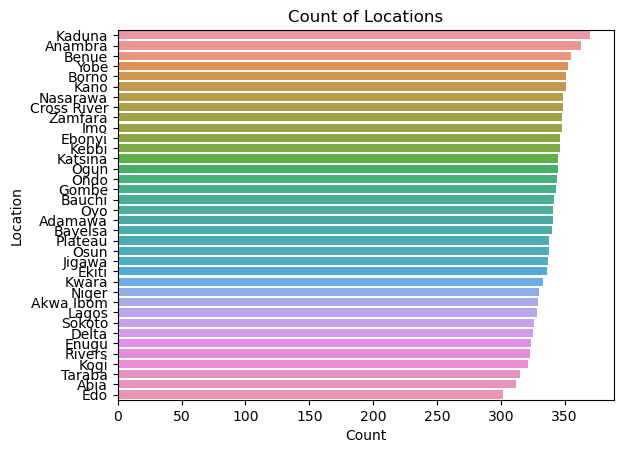

In [11]:
# Create a countplot with count values on the vertical axis
order = train['loc'].value_counts().index  # Get categories ordered by count
sns.countplot(data=train, y='loc', order=order)

plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Count of Locations')

plt.show()

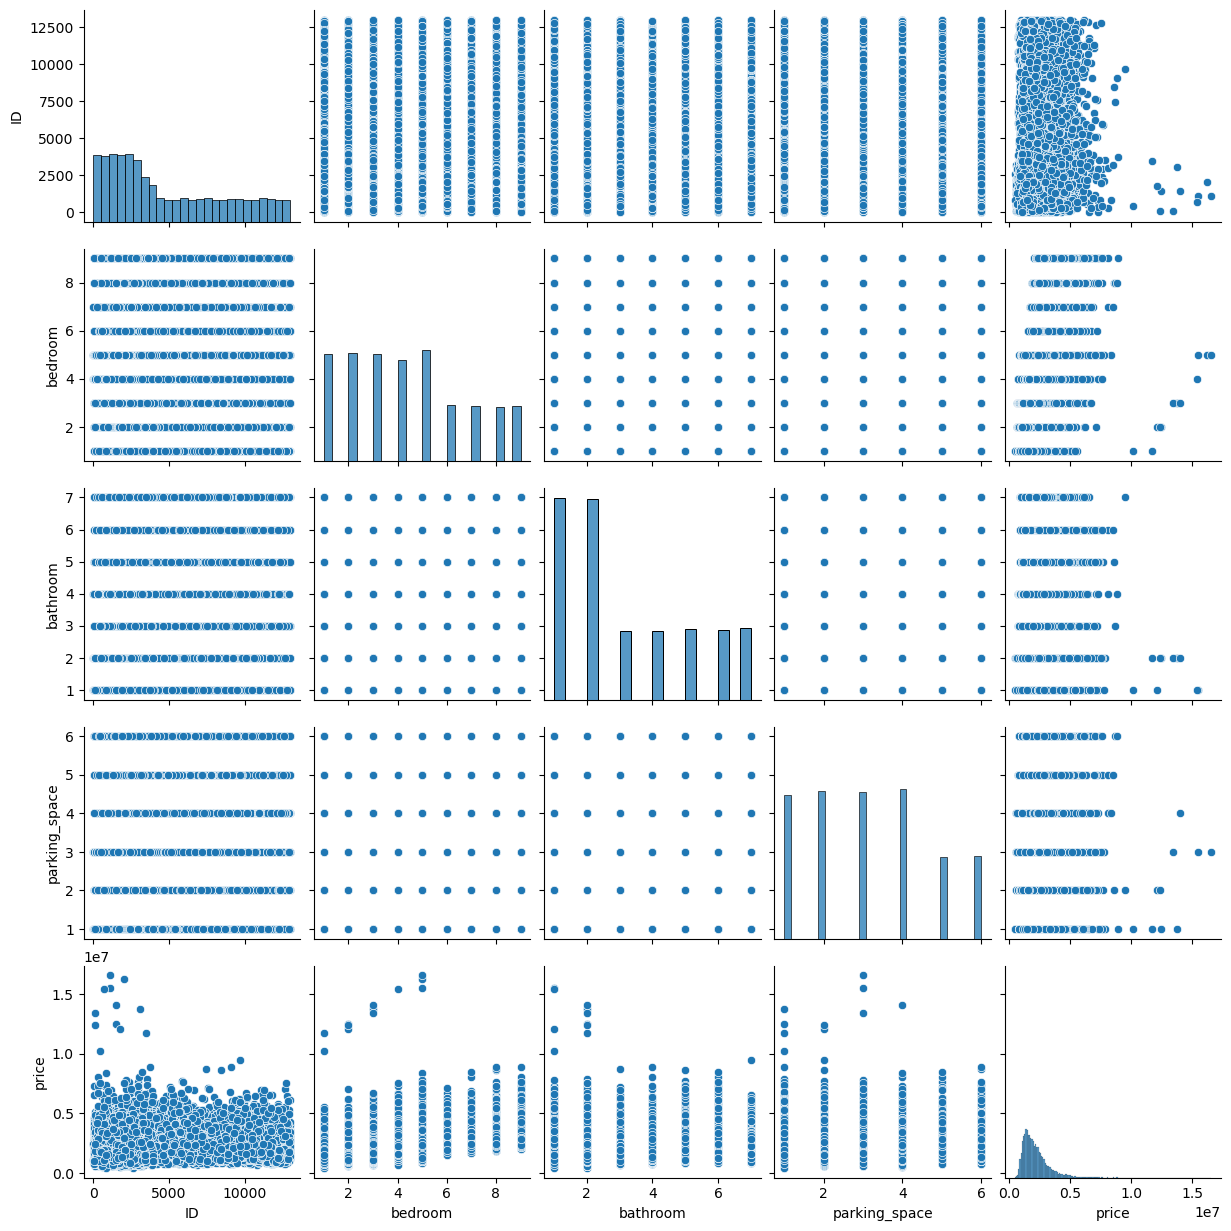

In [13]:
sns.pairplot(train)

<AxesSubplot:xlabel='bedroom', ylabel='Count'>

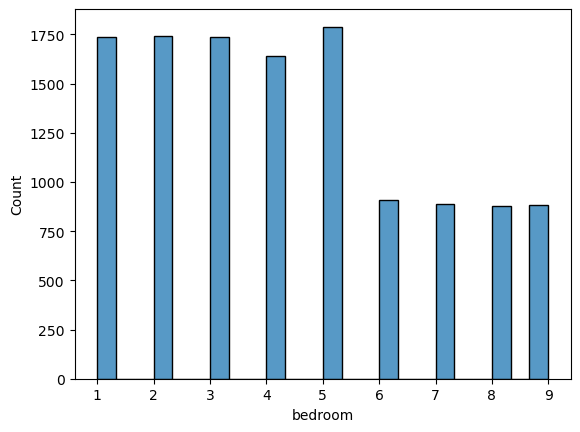

In [14]:
sns.histplot(x = 'bedroom', data = train)

<AxesSubplot:xlabel='bathroom', ylabel='Count'>

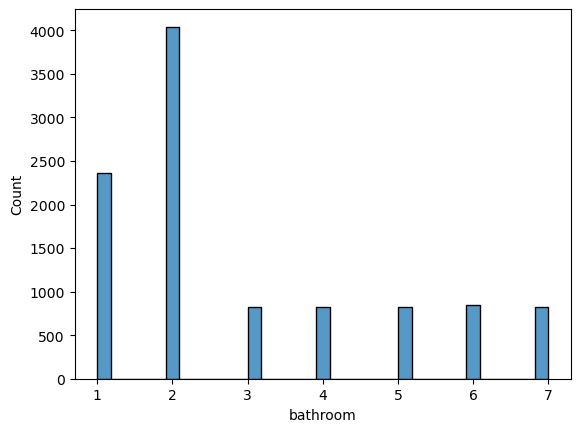

In [43]:
sns.histplot(x = 'bathroom', data = train)

<AxesSubplot:xlabel='parking_space', ylabel='Count'>

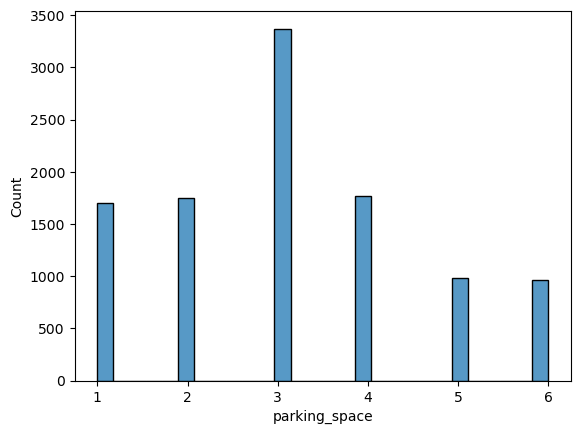

In [44]:
sns.histplot(x = 'parking_space', data = train)

## 4. DATA PREPROCESSING

In [3]:
# Specifying the columns with categorical values that should not contain empty values
columns_to_check = ['loc', 'title']

# Deleting rows with empty values in the specified columns for the train DataFrame
train.dropna(subset=columns_to_check, how='any', inplace=True)



In [4]:
#Filling the missing values in the numerical columns with their median
median_value = train['bedroom'].median()
train['bedroom'].fillna(median_value, inplace = True )

median_value2 = train['bathroom'].median()
train['bathroom'].fillna(median_value2, inplace = True )

median_value3 = train['parking_space'].median()
train['parking_space'].fillna(median_value3, inplace = True)

In [5]:
# Using ordinal encoding for the 'title' column

# Define the mapping of house types to ordinal values based on their price order
price_order = {'Cottage': 1, 'Bungalow': 2, 'Flat': 3, 'Apartment': 4, 'Townhouse': 5,
               'Terrace duplex': 6, 'Semi-detached duplex': 7, 'Detached duplex': 8,
               'Penthouse': 9, 'Mansion': 10}

# Perform ordinal encoding
train['Encoded House Type'] = train['title'].map(price_order)
test['Encoded House Type'] = test['title'].map(price_order)

# Remove the title column from the train and test data
column_to_remove = 'title'
train = train.drop(column_to_remove, axis=1)
test = test.drop(column_to_remove, axis=1)

In [6]:
# Using ordinal encoding for the 'loc' column

# Group the data by 'loc' and calculate the average price for each state
average_prices = train.groupby('loc')['price'].mean()

# Sort the states based on the calculated average prices in ascending order
sorted_states = average_prices.sort_values()

# Sort the states based on the calculated average prices in ascending order
sorted_states = average_prices.sort_values()

# Create a mapping of state names to ordinal values
state_to_ordinal = {state: ordinal for ordinal, state in enumerate(sorted_states.index, start=1)}

# Apply the mapping to the 'State' column to create a new column 'OrdinalState'
train['OrdinalState'] = train['loc'].map(state_to_ordinal)
test['OrdinalState'] = test['loc'].map(state_to_ordinal)

# Remove the 'loc' column from the train and test data
column_to_remove = 'loc'
train = train.drop(column_to_remove, axis=1)
test = test.drop(column_to_remove, axis=1)

In [7]:
#Adding a new column 'total_rooms' which is the sum of the number of bedrooms, bathrooms and parking space
train['total_rooms'] = train['bedroom'] + train['bathroom'] + train['parking_space'] 
test['total_rooms'] = test['bedroom'] + test['bathroom'] + test['parking_space'] 


## 5. Modelling

In [23]:
pip install catboost

SyntaxError: invalid syntax (3979247355.py, line 2)

In [8]:
X = train.drop(['ID',"price"], axis = 'columns')
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test1 = test.drop(['ID'], axis = 'columns')

In [9]:
#Using Catboost Regressor for modelling
model = CatBoostRegressor(silent=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 411973.9145037722


In [11]:
model.fit(X,y)
sub_df = model.predict(test1)

test['price'] = sub_df
try_df = test[['ID', 'price']]


try_df.head()

,ID,price
0,845,2.396662e+06
1,1924,1.025471e+06
2,10718,1.238443e+06
3,12076,8.494547e+06
4,12254,1.907702e+06


In [12]:
try_df.to_csv("submission.csv", index = False)